<a href="https://colab.research.google.com/github/SeptianLee/TI05_Septian_0110223149/blob/main/Septian_Si__TugasDM_praktikum9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
# Import library yang diperlukan untuk data processing dan klasifikasi
import pandas as pd
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi training dan testing
from sklearn.preprocessing import StandardScaler  # Untuk normalisasi data
from sklearn.neighbors import KNeighborsClassifier  # Algoritma K-Nearest Neighbors
from sklearn.metrics import classification_report, confusion_matrix  # Untuk mengevaluasi model

# Mounting Google Drive untuk mengakses file
from google.colab import drive
drive.mount('/content/gdrive')  # Mount Google Drive di Colab

# Membaca file CSV dari Google Drive, melewati baris yang bermasalah
df1 = pd.read_csv("gdrive/My Drive/ColabDataMining/dataset/klasifikasi/kelulusan_test.csv", on_bad_lines='skip', encoding='latin-1')
df2 = pd.read_csv("gdrive/My Drive/ColabDataMining/dataset/klasifikasi/kelulusan_train.csv", on_bad_lines='skip', encoding='latin-1')

# Menampilkan DataFrame pertama (test data)
df1    # Menampilkan DataFrame yang telah diimpor
# df2    # Menampilkan DataFrame kedua (train data) - bisa di-uncomment untuk melihatnya


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.50,0.99,TEPAT
141,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,2.97,TEPAT
142,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,3.03,TEPAT
143,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.00,3.16,TEPAT


In [98]:
# Menampilkan informasi tentang DataFrame df1, termasuk tipe data dan jumlah data non-null
df1.info()

# df2.info()  # Menampilkan informasi tentang DataFrame df2 (train data) - bisa di-uncomment untuk melihatnya


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              145 non-null    object 
 1   JENIS KELAMIN     145 non-null    object 
 2   STATUS MAHASISWA  145 non-null    object 
 3   UMUR              145 non-null    int64  
 4   STATUS NIKAH      145 non-null    object 
 5   IPS 1             145 non-null    float64
 6   IPS 2             145 non-null    float64
 7   IPS 3             145 non-null    float64
 8   IPS 4             145 non-null    float64
 9   IPS 5             145 non-null    float64
 10  IPS 6             145 non-null    float64
 11  IPS 7             145 non-null    float64
 12  IPS 8             141 non-null    float64
 13  IPK               142 non-null    float64
 14  STATUS KELULUSAN  145 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 17.1+ KB


In [99]:
# Mengecek jumlah nilai null (missing values) di setiap kolom pada df1
df1.isnull().sum()

# df2.isnull().sum()  # Mengecek jumlah nilai null (missing values) di setiap kolom pada df2 (train data) - bisa di-uncomment untuk melihatnya


,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [100]:
# Menghitung rata-rata nilai pada kolom 'IPS 8' di df1 untuk menggantikan nilai yang hilang
mean_emp_length = df1['IPS 8'].mean()  # calculate mean for 'IPS 8'
df1['IPS 8'].fillna(mean_emp_length, inplace=True)  # fill missing values with mean in 'IPS 8'

# Menghitung rata-rata nilai pada kolom 'IPK ' di df1 untuk menggantikan nilai yang hilang
mean_emp_length = df1['IPK '].mean()  # calculate mean for 'IPK'
df1['IPK '].fillna(mean_emp_length, inplace=True)  # fill missing values with mean in 'IPK'

# Menghitung rata-rata nilai pada kolom 'IPS 8' di df2 untuk menggantikan nilai yang hilang
mean_emp_length = df2['IPS 8'].mean()  # calculate mean for 'IPS 8'
df2['IPS 8'].fillna(mean_emp_length, inplace=True)  # fill missing values with mean in 'IPS 8'

# Menghitung rata-rata nilai pada kolom 'IPK ' di df2 untuk menggantikan nilai yang hilang
mean_emp_length = df2['IPK '].mean()  # calculate mean for 'IPK'
df2['IPK '].fillna(mean_emp_length, inplace=True)  # fill missing values with mean in 'IPK'


<ipython-input-100-7d984ed75b3a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['IPS 8'].fillna(mean_emp_length, inplace=True)  # fill missing values with mean in 'IPS 8'
<ipython-input-100-7d984ed75b3a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

In [101]:
# Mengganti nilai 'LAKI - LAKI' menjadi 1 dan 'PEREMPUAN' menjadi 2 pada kolom 'JENIS KELAMIN' di df2 dan df1
df2['JENIS KELAMIN'] = df2['JENIS KELAMIN'].replace({'LAKI - LAKI': 1, 'PEREMPUAN': 2})  # replace gender values
df1['JENIS KELAMIN'] = df1['JENIS KELAMIN'].replace({'LAKI - LAKI': 1, 'PEREMPUAN': 2})  # replace gender values

# Mengganti nilai 'MAHASISWA' menjadi 0 dan 'BEKERJA' menjadi 1 pada kolom 'STATUS MAHASISWA' di df2 dan df1
df2['STATUS MAHASISWA'] = df2['STATUS MAHASISWA'].replace({'MAHASISWA': 0, 'BEKERJA': 1})  # replace student status values
df1['STATUS MAHASISWA'] = df1['STATUS MAHASISWA'].replace({'MAHASISWA': 0, 'BEKERJA': 1})  # replace student status values

# Mengganti nilai 'BELUM MENIKAH' menjadi 0 dan 'MENIKAH' menjadi 1 pada kolom 'STATUS NIKAH' di df2 dan df1
df2['STATUS NIKAH'] = df2['STATUS NIKAH'].replace({'BELUM MENIKAH': 0, 'MENIKAH': 1})  # replace marital status values
df1['STATUS NIKAH'] = df1['STATUS NIKAH'].replace({'BELUM MENIKAH': 0, 'MENIKAH': 1})  # replace marital status values


<ipython-input-101-654692ab2a2a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['JENIS KELAMIN'] = df2['JENIS KELAMIN'].replace({'LAKI - LAKI': 1, 'PEREMPUAN': 2})  # replace gender values
<ipython-input-101-654692ab2a2a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['JENIS KELAMIN'] = df1['JENIS KELAMIN'].replace({'LAKI - LAKI': 1, 'PEREMPUAN': 2})  # replace gender values
<ipython-input-101-654692ab2a2a>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To ret

In [102]:
#df1.isnull().sum()
df2.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [103]:
df2

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,2,1,28,0,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,2,0,32,0,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,2,1,29,0,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,2,0,27,0,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,2,1,29,0,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,ARY JULI SETIYANTO,1,0,23,0,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5,0.99,TEPAT
375,RINA ZAHROTUL UMAMI,2,1,23,0,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97,TEPAT
376,TULISA WAHYUHADI KRISNATAMI,2,0,23,0,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03,TEPAT
377,NI'MATUL JANNAH,2,0,23,0,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.16,TEPAT


In [104]:
# Data preprocessing

# Fitur (X) adalah semua kolom kecuali target 'STATUS KELULUSAN'
X_train = df2.drop('STATUS KELULUSAN', axis=1)  # Mengambil fitur untuk data training
X_test = df1.drop('STATUS KELULUSAN', axis=1)   # Mengambil fitur untuk data testing

# Target (y) adalah kolom 'STATUS KELULUSAN'
y_train = df2['STATUS KELULUSAN']  # Mengambil target untuk data training
y_test = df1['STATUS KELULUSAN']   # Mengambil target untuk data testing

# Gabungkan dataset untuk konsistensi encoding
combined = pd.concat([X_train, X_test])  # Menggabungkan X_train dan X_test untuk encoding kategori secara konsisten

# Encoding data kategorikal dengan one-hot encoding
combined = pd.get_dummies(combined, columns=['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH'])  # Mengubah variabel kategorikal menjadi kolom numerik

# Pisahkan kembali dataset menjadi X_train_encoded dan X_test_encoded setelah encoding
X_train_encoded = combined.iloc[:len(X_train), :]  # Mengambil data training setelah encoding
X_test_encoded = combined.iloc[len(X_train):, :]   # Mengambil data testing setelah encoding


In [105]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder untuk encoding label

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()  # Membuat objek LabelEncoder

# Terapkan LabelEncoder pada y_train dan y_test
y_train = label_encoder.fit_transform(y_train)  # Melakukan encoding pada data training
y_test = label_encoder.transform(y_test)  # Melakukan encoding pada data testing

# Periksa hasil perubahan
print(y_train[:5])  # Menampilkan 5 nilai pertama hasil encoding y_train
print(y_test[:5])   # Menampilkan 5 nilai pertama hasil encoding y_test


[1 1 1 1 1]
[0 0 0 0 0]


In [106]:
# Hapus kolom 'NAMA' dari X_train dan X_test, karena kolom ini tidak relevan untuk prediksi
X_train = X_train.drop('NAMA', axis=1)  # Menghapus kolom 'NAMA' pada data training
X_test = X_test.drop('NAMA', axis=1)  # Menghapus kolom 'NAMA' pada data testing

# Standarisasi data
from sklearn.preprocessing import StandardScaler  # Import StandardScaler untuk normalisasi data

scaler = StandardScaler()  # Membuat objek StandardScaler
X_train = scaler.fit_transform(X_train)  # Melakukan fit dan transformasi pada data training
X_test = scaler.transform(X_test)  # Melakukan transformasi pada data testing berdasarkan fitting data training


In [107]:
# Training model menggunakan algoritma K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)  # Tentukan jumlah tetangga terdekat (k=5, nilai ganjil untuk menghindari hasil seri)
knn.fit(X_train, y_train)  # Melatih model dengan data training (X_train) dan target (y_train)


KNeighborsClassifier()

Text(0.5, 1.0, 'Confusion Matrix')

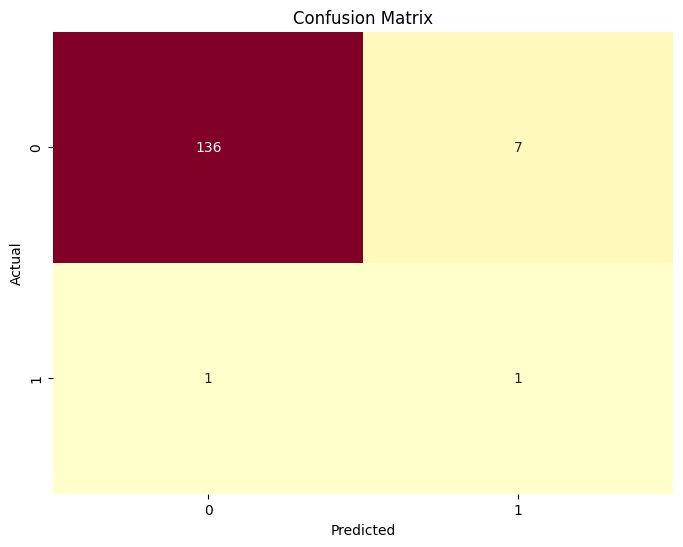

In [108]:
# Import library yang diperlukan untuk visualisasi dan evaluasi
import seaborn as sns  # Untuk visualisasi data menggunakan heatmap
import matplotlib.pyplot as plt  # Untuk plotting grafik
from sklearn.metrics import confusion_matrix, roc_curve, auc  # Untuk menghitung confusion matrix dan ROC curve

# Lakukan prediksi pada data uji (X_test) menggunakan model KNN yang sudah dilatih
y_pred = knn.predict(X_test)

# Hitung confusion matrix untuk mengevaluasi hasil prediksi
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(8, 6))  # Tentukan ukuran gambar
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', xticklabels=['0', '1'], yticklabels=['0', '1'], cbar=False)
# annot=True menampilkan nilai di dalam sel heatmap, fmt='d' untuk format angka integer
# cmap='YlOrRd' untuk warna biru, xticklabels dan yticklabels menyesuaikan dengan label kelas 0 dan 1
plt.xlabel('Predicted')  # Label sumbu x (Prediksi)
plt.ylabel('Actual')  # Label sumbu y (Nilai aktual)
plt.title('Confusion Matrix')  # Judul visualisasi


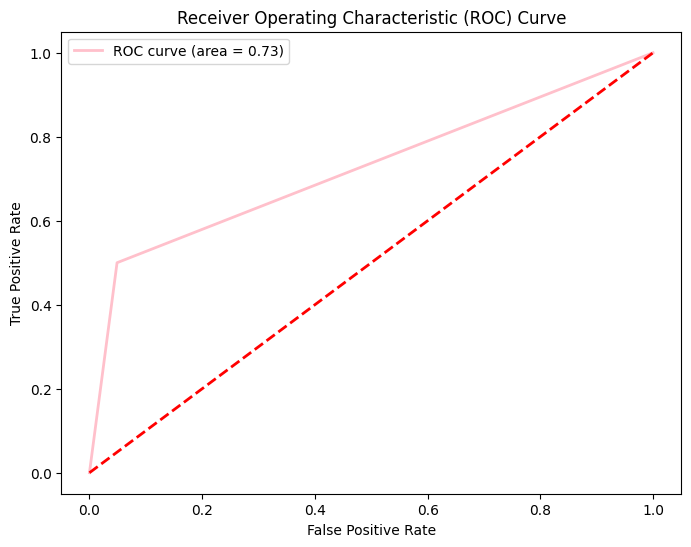

In [109]:
# Visualisasi data prediksi menggunakan ROC curve

# Menghitung False Positive Rate (FPR) dan True Positive Rate (TPR) serta threshold dari prediksi
fpr, tpr, threshold = roc_curve(y_test, y_pred)

# Menghitung AUC (Area Under Curve) untuk menilai performa model
roc_auc = auc(fpr, tpr)

# Visualisasi ROC Curve
plt.figure(figsize=(8, 6))  # Tentukan ukuran gambar
plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# Plot ROC curve dengan warna orange gelap, lw=2 untuk ketebalan garis, dan menampilkan AUC di label
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
# Plot garis diagonal yang menunjukkan kinerja acak (random), sebagai pembanding
plt.xlabel('False Positive Rate')  # Label sumbu x (FPR)
plt.ylabel('True Positive Rate')  # Label sumbu y (TPR)
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Judul grafik
plt.legend(loc="upper left")  # Menampilkan legend di sudut kanan bawah
plt.show()  # Menampilkan grafik


In [111]:
# Evaluasi model

# Lakukan prediksi pada data uji
y_pred = knn.predict(X_test)

# Tampilkan confusion matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
# Confusion matrix memberikan informasi tentang jumlah prediksi yang benar dan salah untuk masing-masing kelas

# Tampilkan classification report untuk metrik evaluasi lainnya (precision, recall, f1-score)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
# Classification report memberikan metrik evaluasi seperti precision, recall, f1-score, dan support untuk setiap kelas


Confusion Matrix:

[[136   7]
 [  1   1]]

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       143
           1       0.12      0.50      0.20         2

    accuracy                           0.94       145
   macro avg       0.56      0.73      0.59       145
weighted avg       0.98      0.94      0.96       145

